In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("data_badminton.csv")

In [3]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df.shape

(8518, 8)

In [5]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [8]:
df[df.duplicated()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings


In [9]:
df['Review text']

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

In [10]:
df['Review text'].iloc[0]

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [11]:
df.head(1)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4


In [12]:
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    else:
        return 'Negative'
    
df['Sentiment'] = df['Ratings'].apply(classify_sentiment)

In [13]:
df['Sentiment'] = df.Sentiment.map({'Positive':1, 'Negative':0})

In [14]:
df.head(1)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1


In [15]:
para=' '.join(df['Review text'])

In [16]:
para

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE They didn\'t supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE Worst product. Damaged shuttlecocks packed in new box. It\'s not a original yonex product. Don\'t buy.flipkart platform is chosen to fraud the buyers.READ MORE Good quality product. Delivered on time.READ MORE BEST PURCHASE It is a good quality and is more durable than any average shuttle. And shipping was goodREAD MORE Good quality original shuttles.READ MORE AwesomeREAD MORE nice original productsREAD MORE This GREEN CAP SHUTTLECOCK is really AWESOME. Quality is BEST and GOOD PACKING.This GREEN CAP SHUTTLECOCK is played at WARM CONDITIONS.Worth for MONEY. Simply LOVED it.....READ MORE Best in class....READ MORE it\'s genuine and price is less than our near by shop

In [17]:
# Distribution on target variable looks non-uniform

df['Sentiment'].value_counts(normalize=True)


Sentiment
1    0.80644
0    0.19356
Name: proportion, dtype: float64

In [18]:

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

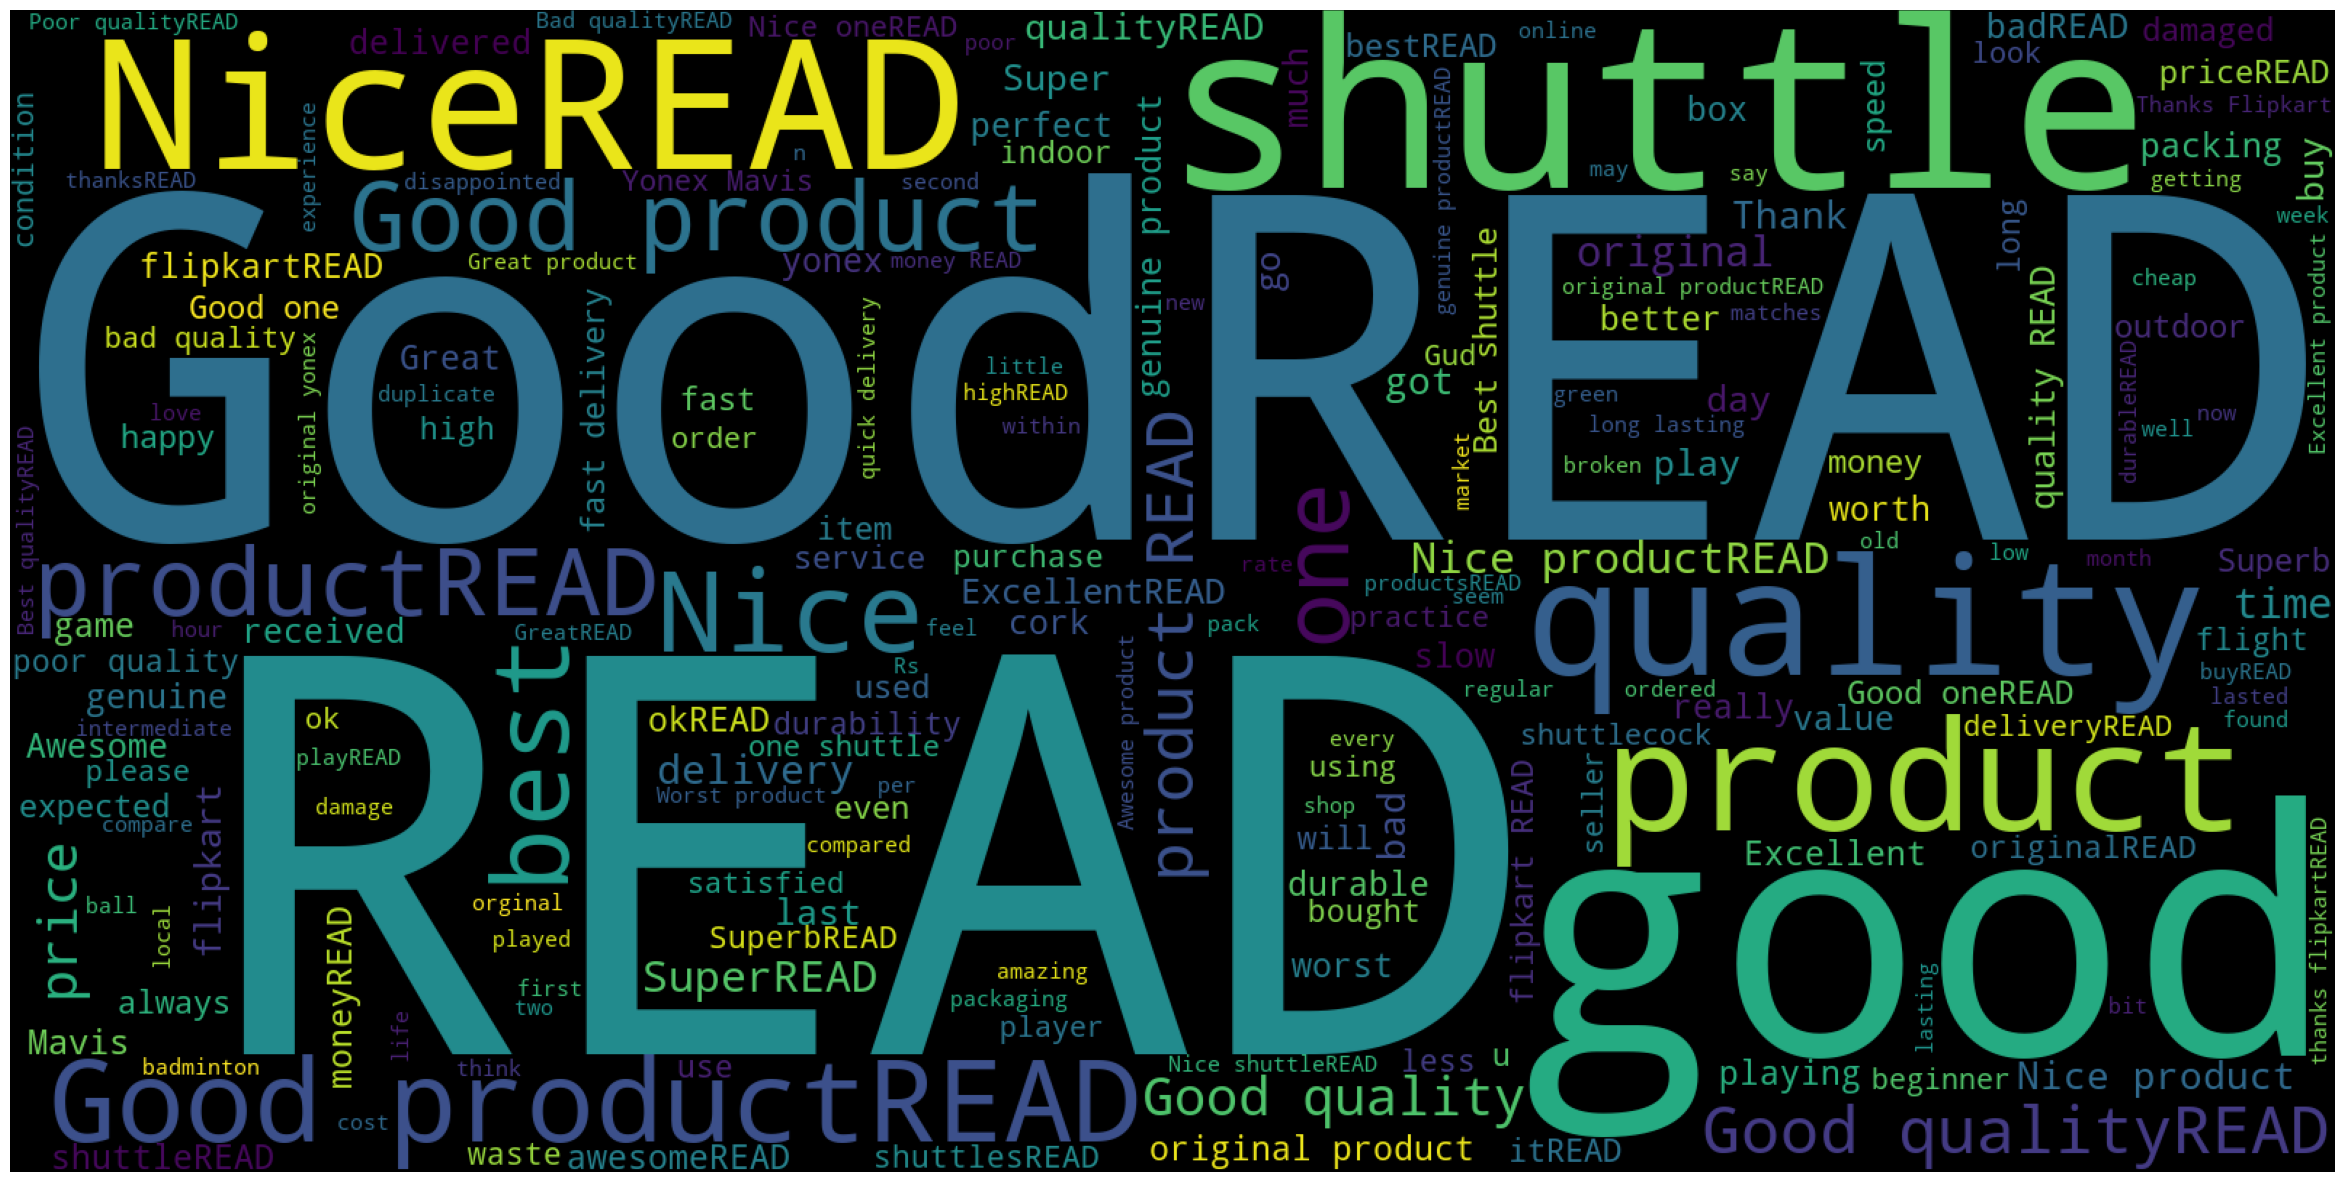

In [19]:
display_wordcloud(df['Review text'])

In [20]:
X=df['Review text']
y=df['Sentiment']

In [21]:
X

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

In [22]:
y

0       1
1       0
2       0
5       1
6       1
       ..
8495    1
8496    0
8497    0
8499    1
8507    1
Name: Sentiment, Length: 8013, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=25)

In [25]:
X_train

8398                         Very nice ExcellentREAD MORE
7842                                Good productREAD MORE
3802                                        GoodREAD MORE
8347                                      AwsomeREAD MORE
7054                                        niceREAD MORE
                              ...                        
7945                                        GoodREAD MORE
2651                               Super productREAD MORE
7078                                    good oneREAD MORE
778     It's original and it's the best.Go for it with...
5712                               Great qualityREAD MORE
Name: Review text, Length: 6410, dtype: object

In [26]:
X_test

7688                                It's awesomeREAD MORE
866             Good quality shuttles, worth it.READ MORE
2764                                        NiceREAD MORE
5059                           Very good productREAD MORE
5995                                       superREAD MORE
                              ...                        
3032                                        GoodREAD MORE
7983                                        GoodREAD MORE
5328                     good for daily practiceREAD MORE
7344    Shuttle base is very poor, Recent shuttles com...
4126    every purchase rate increased and product quql...
Name: Review text, Length: 1603, dtype: object

In [27]:
import string
! pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\FOUZIA
[nltk_data]     KOUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\FOUZIA
[nltk_data]     KOUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
def preprocess(review):
    # Removing special characters and digits
    review = re.sub("[^a-zA-Z]", " ", review)
    
    # change text to lower case
    review = review.lower()

    # tokenize into words
    review=review.split()
    
    # remove stop words                
    review= [word for word in review if word not in stopwords.words("english")]
    review= [word for word in review if word not in ['more']]
    review= [word for word in review if not re.search(r'read[a-z]*', word)]
    
    # Stemming/Lemmatization
    wl=WordNetLemmatizer()
    review=[wl.lemmatize(word,pos='v') for word in review ]
    review=' '.join(review)
    return review

In [32]:
X_train= X_train.apply(preprocess)

In [33]:
X_train

8398                                   nice
7842                                   good
3802                                       
8347                                       
7054                                       
                       ...                 
7945                                       
2651                                  super
7078                                   good
778     original best go without hesitation
5712                                  great
Name: Review text, Length: 6410, dtype: object

In [34]:
X_test = X_test.apply(preprocess)


In [35]:
X_test

7688                                                     
866                            good quality shuttle worth
2764                                                     
5059                                                 good
5995                                                     
                              ...                        
3032                                                     
7983                                                     
5328                                           good daily
7344    shuttle base poor recent shuttle come porous w...
4126         every purchase rate increase product quqlity
Name: Review text, Length: 1603, dtype: object

In [36]:
y_train

8398    1
7842    1
3802    1
8347    1
7054    1
       ..
7945    1
2651    1
7078    1
778     1
5712    1
Name: Sentiment, Length: 6410, dtype: int64

In [37]:
import mlflow

mlflow.set_experiment("sentiment_analysis_prediction")

2024/04/01 12:58:57 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/FOUZIA%20KOUSER/mlruns/897777676398741445', creation_time=1711956537766, experiment_id='897777676398741445', last_update_time=1711956537766, lifecycle_stage='active', name='sentiment_analysis_prediction', tags={}>

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
! pip install joblib
from joblib import Memory
import joblib
import os

In [39]:
import warnings

warnings.filterwarnings('ignore')

In [40]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 5000],  
            'vectorization__ngram_range': [(1, 1), (1, 2)],  
            'vectorization__stop_words': [None, 'english'],  
            'classifier__alpha' : [0.1, 0.5, 1.0, 2.0, 5.0] 
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [ 1000,2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000,2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 5000], 
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 5000],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ], 
'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            
            'classifier__n_neighbors' :  [3, 5, 7], 
            'classifier__p' : [1, 2, 3]
        }
    ]
}

In [41]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** naive_bayes **********


2024/04/01 12:59:01 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/04/01 12:59:01 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'

Fitting 5 folds for each of 120 candidates, totalling 600 fits
CPU times: total: 47.8 s
Wall time: 1min 8s
Train Score:  0.8728549141965679
Test Score:  0.8671241422333126

********** decision_tree **********


2024/04/01 13:00:10 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 10 s
Wall time: 18.2 s
Train Score:  0.8564742589703588
Test Score:  0.8552713661883967

********** logistic_regression **********


2024/04/01 13:00:29 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 4min 34s
Wall time: 5min 44s
Train Score:  0.8555382215288612
Test Score:  0.860885839051778

********** random_forest **********


2024/04/01 13:06:14 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 3min 30s
Wall time: 4min 14s
Train Score:  0.8686427457098285
Test Score:  0.867747972551466

********** svc **********


2024/04/01 13:10:28 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 2min 38s
Wall time: 3min 53s
Train Score:  0.8706708268330733
Test Score:  0.868995633187773

********** knn **********


2024/04/01 13:14:24 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 1min 8s
Wall time: 1min 21s
Train Score:  0.8566302652106085
Test Score:  0.8546475358702433



In [42]:
mlflow.sklearn.autolog(disable=True)

In [43]:
import time
import joblib
import os

In [44]:
dev = "Fouzia Kouser"
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )

    # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test)
    end_predict_time = time.time()

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'best_models/{algo}.pkl')
    model_size = os.path.getsize(f'best_models/{algo}.pkl')

    # Pring Log
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    
    print()

    # Start the experiment run
    with mlflow.start_run() as run:
        # Log tags with mlflow.set_tag()
        mlflow.set_tag("developer", dev)

        # Log Parameters with mlflow.log_param()
        mlflow.log_param("algorithm", algo)
        mlflow.log_param("hyperparameter_grid", param_grids[algo])
        mlflow.log_param("best_hyperparameter", grid_search.best_params_)

        # Log Metrics with mlflow.log_metric()
        mlflow.log_metric("train_score", grid_search.best_score_)
        mlflow.log_metric("test_score", grid_search.score(X_test, y_test))
        mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
        mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
        mlflow.log_metric("model_size", model_size)

        # Log Model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")

********** naive_bayes **********
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Train Score:  0.8728549141965679
Test Score:  0.8671241422333126
Fit Time:  55.760106801986694
Predict Time:  0.01599740982055664
Model Size:  223047

********** decision_tree **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Train Score:  0.8567862714508581
Test Score:  0.8552713661883967
Fit Time:  20.111919403076172
Predict Time:  0.010098934173583984
Model Size:  56265

********** logistic_regression **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Train Score:  0.8558502340093603
Test Score:  0.860885839051778
Fit Time:  353.3257167339325
Predict Time:  0.01443338394165039
Model Size:  57770

********** random_forest **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Train Score:  0.8677067082683309
Test Score:  0.8627573300062383
Fit Time:  250.06446433067322
Predict Time:  0.04894256591796875
Model Size:  8809873

***